# Pattern Recognition Assignment: Optical Character Recognition

Reference: 
1. https://data-flair.training/blogs/python-deep-learning-project-handwritten-digit-recognition/
2. https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

In [1]:
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import tensorflow as tf
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from tensorflow.keras.optimizers import SGD

2022-04-01 16:11:29.754635: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-01 16:11:29.754657: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
data_path = fr'{os.getenv("HOME")}/Puezzz/CNN_patternreg/cnn-proj/doc-data/ocr_images/'
os.listdir(data_path)

['test', 'eval', 'train']

# Must extract number digit from .bmp file before doing below section!
## Data Preprocessing

1. Read image and resize to 70x70
2. Change to numpy array
3. Reshape for keras model format
4. One-hot encoding

In [3]:
x_test_list = []
x_train_list = []
y_test_list = []
y_train_list = []

include = ['test', 'eval', 'train']
x_test = np.zeros([70, 70])
for subdir in os.listdir(data_path):
    count = 0
    if subdir in include:
        # print(subdir)
        datatype_path = os.path.join(data_path, subdir)
        for subd in os.listdir(datatype_path):
            if subd[-3:] not in {'bmp'}:
                # print(subd)
                current_path = os.path.join(datatype_path, subd)
                for fi in os.listdir(current_path):
                    # print(current_path, fi)
                    if fi[-3:] in {'jpg', 'png'}:
                        image = Image.open(os.path.join(current_path, fi)).convert('L')
                        image = image.resize((70, 70))
                        image = np.asarray(image)
                        # print()
                        if subdir == 'test':
                            x_test_list.append(image)
                            y_test_list.append(int(subd[0]))
                        elif subdir == 'train':
                            x_train_list.append(image)
                            y_train_list.append(int(subd[0]))
                        # print(data.shape)
                        count += 1
    print('count -> ', count, ' in ', subdir)

count ->  293  in  test
count ->  464  in  eval
count ->  976  in  train


In [4]:
x_test = np.concatenate(x_test_list).reshape(len(x_test_list), *x_test_list[0].shape)
x_train = np.concatenate(x_train_list).reshape(len(x_train_list), *x_train_list[0].shape)
print(x_test.shape, x_train.shape)
y_test = np.array(y_test_list)
y_train = np.array(y_train_list)
print(y_test.shape, y_train.shape)
# print(y_train)

(293, 70, 70) (976, 70, 70)
(293,) (976,)


In [5]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, Y_train, Y_test = train_test_split(
    x_train, 
    y_train, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

In [6]:
num_classes = 10

X_train = X_train.reshape(X_train.shape[0], 70, 70, 1)
X_test = X_test.reshape(X_test.shape[0], 70, 70, 1)
input_shape = (70, 70, 1)

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print('y_train shape:', Y_train.shape)
print('y_test shape:', Y_test.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (780, 70, 70, 1)
y_train shape: (780, 10)
y_test shape: (196, 10)
780 train samples
196 test samples


# Create model
1. Input 70x70x1 
2. 2D Convolutional 32 nodes
3. Max-Pooling 2D 2x2
4. Flatten layer
5. Fully Connected 1st layer 100 nodes
6. Fully Connected 2nd layer 10 nodes
7. SGD Optimizer
8. Output

In [7]:
batch_size = 32
epochs = 10

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(70, 70, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

2022-04-01 16:11:32.163862: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-01 16:11:32.163887: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-01 16:11:32.163903: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (theflames): /proc/driver/nvidia/version does not exist
2022-04-01 16:11:32.164114: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Training Section

In [8]:
hist = model.fit(X_train, Y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, Y_test))
print("The model has successfully trained")

model.save('cnn_assignment_model.h5')

Epoch 1/10
25/25 [==============================] - 1s 47ms/step - loss: 5.9552 - accuracy: 0.3551 - val_loss: 1.6839 - val_accuracy: 0.7296
Epoch 2/10
25/25 [==============================] - 1s 44ms/step - loss: 0.6007 - accuracy: 0.9141 - val_loss: 0.2618 - val_accuracy: 0.9235
Epoch 3/10
25/25 [==============================] - 1s 44ms/step - loss: 0.0490 - accuracy: 0.9846 - val_loss: 0.1190 - val_accuracy: 0.9745
Epoch 4/10
25/25 [==============================] - 1s 47ms/step - loss: 0.0098 - accuracy: 0.9987 - val_loss: 0.0609 - val_accuracy: 0.9796
Epoch 5/10
25/25 [==============================] - 1s 39ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0621 - val_accuracy: 0.9796
Epoch 6/10
25/25 [==============================] - 1s 39ms/step - loss: 0.0058 - accuracy: 0.9987 - val_loss: 0.0565 - val_accuracy: 0.9796
Epoch 7/10
25/25 [==============================] - 1s 39ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0593 - val_accuracy: 0.9796
Epoch 8/10
25

# Evaluate Section

In [9]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.052817992866039276
Test accuracy: 0.9795918464660645


# Test with split data

Train: X=(780, 70, 70, 1), y=(780, 10)
Test: X=(196, 70, 70, 1), y=(196, 10)
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


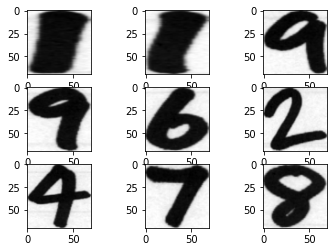

In [10]:
print('Train: X=%s, y=%s' % (X_train.shape, Y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, Y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
	print(Y_train[i])
# show the figure
plt.show()

# Predict data in test.bmp

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


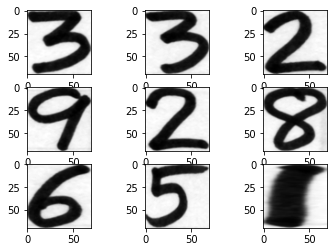

In [11]:
res = model.predict(x_test)

for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_test[i], cmap=plt.get_cmap('gray'))
	print(res[i])
plt.show()